In [366]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [368]:
# import files as df
df_wine = pd.read_csv("datafiles/WineQT.csv")
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [370]:
# Check the shape of the data
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [372]:
df_wine.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality  Id  
4.6            0.52              0.15         2.1             0.054      8.0                  65.0                  0.99340  3.90  0.56       13.1     4        45      1
8.7            0.54              0.26         2.5             0.097      7.0                  31.0                  0.99760  3.27  0.60       9.3      6        630     1
               0.70              0.24         2.5             0.226      5.0                  15.0                  0.99910  3.32  0.60       9.0      6        567     1
               0.69              0.31         3.0             0.086      23.0                 81.0                  1.00020  3.48  0.74       11.6     6        499     1
                                                                                                                                                           

In [374]:
# Check for data types
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [376]:
# Check for missing values
df_wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

In [378]:
# Check for dulpicated values
df_wine.duplicated().any()

False

In [380]:
# Summary of the data
column_summary_df_wine = pd.DataFrame({
    'Column Name': df_wine.columns,
    'Data Type': df_wine.dtypes.values,
    'Percentage Null': df_wine.isnull().mean().values * 100,
    'Unique Values': df_wine.nunique().values
})

print(column_summary_df_wine)

             Column Name Data Type  Percentage Null  Unique Values
0          fixed acidity   float64              0.0             91
1       volatile acidity   float64              0.0            135
2            citric acid   float64              0.0             77
3         residual sugar   float64              0.0             80
4              chlorides   float64              0.0            131
5    free sulfur dioxide   float64              0.0             53
6   total sulfur dioxide   float64              0.0            138
7                density   float64              0.0            388
8                     pH   float64              0.0             87
9              sulphates   float64              0.0             89
10               alcohol   float64              0.0             61
11               quality     int64              0.0              6
12                    Id     int64              0.0           1143


In [382]:
# Exploratory Data Analysis
# Check numerical distribution of data
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


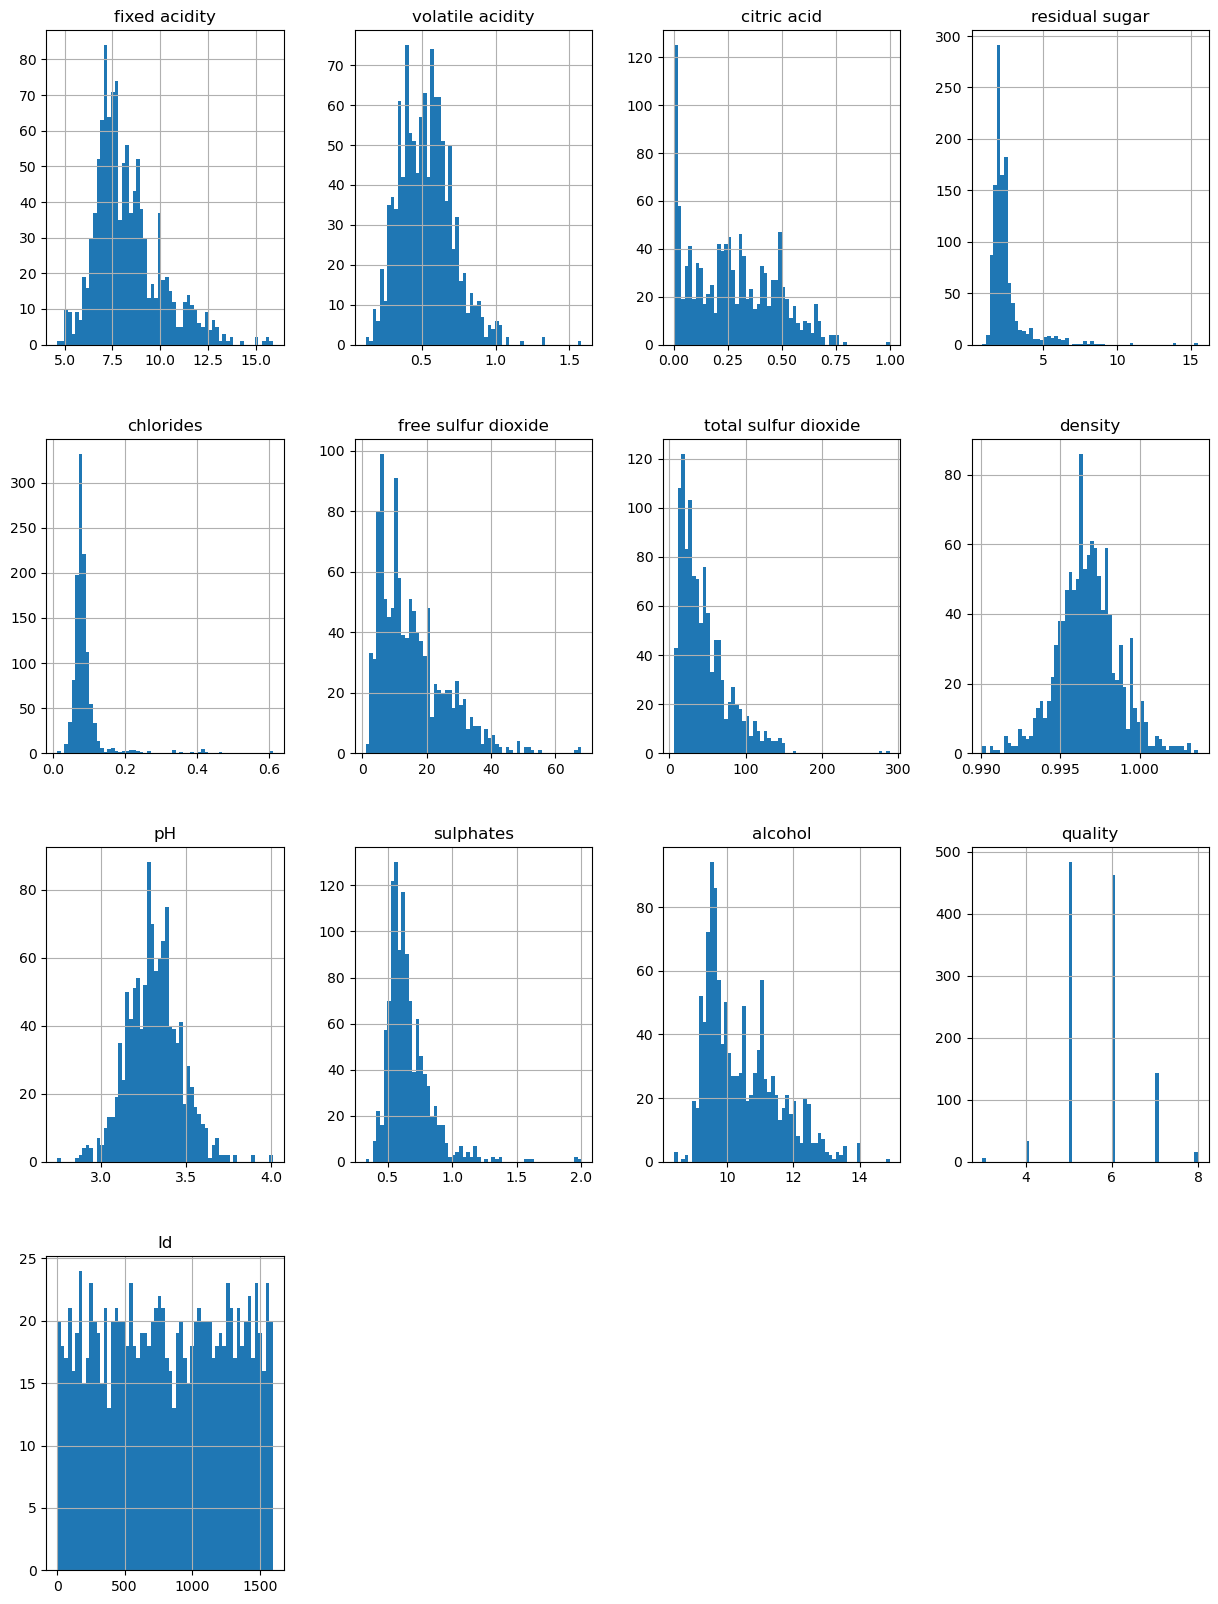

In [384]:
# Exploratory Data Analysis
# Creating histograms for each numerical column in 'df_wine' to check for graphical distribution
df_wine.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_41944\1389242115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="quality", data=df_wine, palette="viridis")


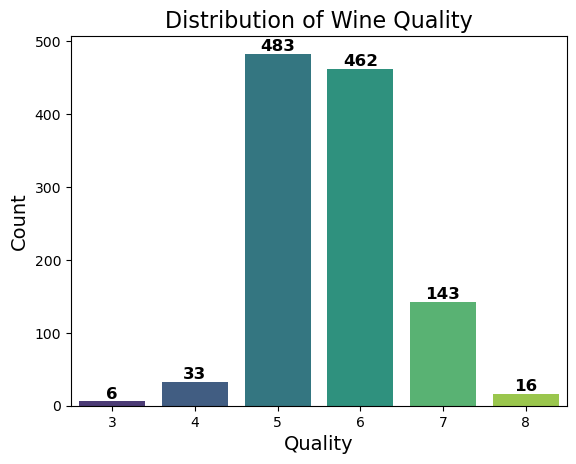

In [554]:
# Creating a count plot of the wine quality rating

ax = sns.countplot(x="quality", data=df_wine, palette="viridis")

# Label the axes and title
plt.xlabel("Quality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Wine Quality", fontsize=16)

# Add value labels on top of bars
for bar in ax.patches:  # Get bars from the seaborn plot
    yval = bar.get_height()  # Get bar height (coefficient value)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

In [386]:
# Feature and Target selection
# Select feature colums
df_wine_feature = df_wine.select_dtypes(include=['float64'])
df_wine_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
dtypes: float64(11)
memory usage: 98.4 KB


In [387]:
# define "quality" as target
df_wine_target = df_wine["quality"]
df_wine_target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1143 entries, 0 to 1142
Series name: quality
Non-Null Count  Dtype
--------------  -----
1143 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [392]:
# Train Test Split of the dataset
# split X (features) and y (target) into X_train, X_test, y_train, and y_test. 
# 80% of the data should be in the training set and 20% in the test set.

X_train, X_test, y_train, y_test = train_test_split(df_wine_feature, df_wine_target, test_size=0.20, random_state=0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 1050 to 684
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         914 non-null    float64
 1   volatile acidity      914 non-null    float64
 2   citric acid           914 non-null    float64
 3   residual sugar        914 non-null    float64
 4   chlorides             914 non-null    float64
 5   free sulfur dioxide   914 non-null    float64
 6   total sulfur dioxide  914 non-null    float64
 7   density               914 non-null    float64
 8   pH                    914 non-null    float64
 9   sulphates             914 non-null    float64
 10  alcohol               914 non-null    float64
dtypes: float64(11)
memory usage: 85.7 KB


In [394]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 946 to 568
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         229 non-null    float64
 1   volatile acidity      229 non-null    float64
 2   citric acid           229 non-null    float64
 3   residual sugar        229 non-null    float64
 4   chlorides             229 non-null    float64
 5   free sulfur dioxide   229 non-null    float64
 6   total sulfur dioxide  229 non-null    float64
 7   density               229 non-null    float64
 8   pH                    229 non-null    float64
 9   sulphates             229 non-null    float64
 10  alcohol               229 non-null    float64
dtypes: float64(11)
memory usage: 21.5 KB


In [396]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 914 entries, 1050 to 684
Series name: quality
Non-Null Count  Dtype
--------------  -----
914 non-null    int64
dtypes: int64(1)
memory usage: 14.3 KB


In [398]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 229 entries, 946 to 568
Series name: quality
Non-Null Count  Dtype
--------------  -----
229 non-null    int64
dtypes: int64(1)
memory usage: 3.6 KB


In [400]:
# Normlization: MinMax Scaler for standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = MinMaxScaler()

In [402]:
# fitting = calculating min and max for each column
normalizer.fit(X_train)

MinMaxScaler()

In [404]:
# transforming = using the min and max data to scale the rest of the values
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [406]:
# The normalizer returns an array instead of a dataframe
X_train_norm

array([[0.13274336, 0.39669421, 0.10126582, ..., 0.45217391, 0.12962963,
        0.4       ],
       [0.54867257, 0.16528926, 0.55696203, ..., 0.31304348, 0.27777778,
        0.24615385],
       [0.38053097, 0.23140496, 0.40506329, ..., 0.45217391, 0.27160494,
        0.32307692],
       ...,
       [0.46017699, 0.2231405 , 0.5443038 , ..., 0.28695652, 0.08024691,
        0.46153846],
       [0.22123894, 0.33057851, 0.03797468, ..., 0.55652174, 0.16666667,
        0.21538462],
       [0.37168142, 0.17355372, 0.51898734, ..., 0.3826087 , 0.17901235,
        0.56923077]])

In [408]:
# creating a dataframe of the X_train array again
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.132743,0.396694,0.101266,0.061644,0.098497,0.194030,0.137809,0.241557,0.452174,0.129630,0.400000
1,0.548673,0.165289,0.556962,0.047945,0.085142,0.223881,0.109541,0.618943,0.313043,0.277778,0.246154
2,0.380531,0.231405,0.405063,0.321918,0.125209,0.134328,0.144876,0.662996,0.452174,0.271605,0.323077
3,0.327434,0.438017,0.126582,0.136986,0.128548,0.238806,0.120141,0.584435,0.373913,0.135802,0.169231
4,0.424779,0.231405,0.392405,0.089041,0.130217,0.179104,0.197880,0.479442,0.182609,0.185185,0.323077


In [410]:
# same for the X_test array
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.398230,0.541322,0.278481,0.089041,0.111853,0.164179,0.148410,0.552863,0.278261,0.111111,0.184615
1,0.203540,0.801653,0.075949,0.082192,0.081803,0.164179,0.088339,0.347283,0.565217,0.061728,0.461538
2,0.398230,0.528926,0.860759,0.054795,0.671119,0.253731,0.204947,0.473568,0.034783,0.617284,0.107692
3,0.389381,0.561983,0.151899,0.102740,0.118531,0.104478,0.077739,0.608664,0.408696,0.197531,0.307692
4,0.238938,0.214876,0.265823,0.075342,0.113523,0.089552,0.102473,0.442731,0.408696,0.086420,0.169231


In [412]:
# KNN Classifier Model
# Initialize a KNN instance without setting any hyperparameter.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)   # default is n_neighbors=5
knn

KNeighborsClassifier(n_neighbors=20)

In [414]:
# Fit knn model to df_wine data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [416]:
# Fit knn model to normalized df_wine data
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=20)

In [418]:
# Evaluate the knn model: make a prediction for X_test
pred = knn.predict(X_test)
pred

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [420]:
# Evaluate the knn model: make a prediction for X_test_norm
pred_norm = knn.predict(X_test_norm)
pred_norm

array([5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 6, 7, 6, 6, 5, 6, 5, 7, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5,
       7, 5, 5, 6, 5, 5, 6, 6, 6, 7, 6, 7, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 5, 5, 6, 5, 5,
       5, 6, 5, 7, 5, 6, 5, 7, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6,
       5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 5, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 6, 7, 6, 6, 6, 6, 5, 5, 5, 5, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 5, 6, 7, 5, 5], dtype=int64)

In [422]:
# Check for the real quality values of the dataset
y_test.values

array([5, 4, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       7, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 4, 5, 6, 5, 6, 6, 6,
       5, 5, 5, 7, 8, 6, 6, 5, 5, 7, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 5, 7, 5, 5, 6, 7, 6, 7, 6, 7, 5, 7, 5, 5, 6, 5, 6, 6, 6, 5,
       5, 7, 6, 7, 4, 5, 6, 6, 5, 5, 5, 5, 3, 5, 8, 5, 6, 6, 6, 6, 5, 5,
       5, 5, 5, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 7, 6,
       6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 7, 5, 5, 6, 7, 6, 5, 5, 6, 6, 6,
       5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 7, 7, 7, 6, 5, 4, 5, 7, 6, 6,
       6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 4, 4, 5, 7, 5, 5, 6, 6, 5, 5, 6,
       6, 6, 5, 6, 4, 7, 7, 7, 5, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 6, 5, 7,
       6, 6, 6, 5, 5, 6, 7, 5, 5], dtype=int64)

In [424]:
# Calculates the accuracy of the knn model without normalization of the data
accuracy_knn=knn.score(X_test, y_test)
accuracy_knn

0.45414847161572053

In [426]:
# Calculates the accuracy of the knn model after normalization of the data
accuracy_knn_norm=knn.score(X_test_norm, y_test)
accuracy_knn_norm

0.6200873362445415

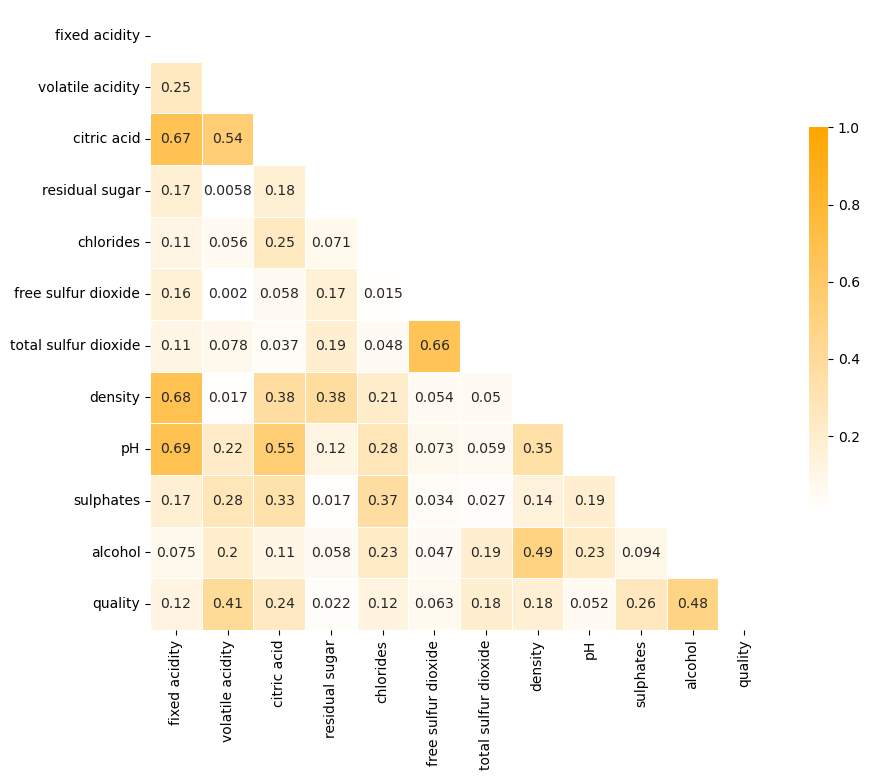

In [428]:
# Feature Engineering:
# Normalizing the data had a big impact on KNN performance.
# Still, every single feature of the dataset is used for KNN modelling.
# Thus, a selection of features based on correlactions between themselves but also with the target is recommended.
# Desired is a low correlaction between features, but a high correlaction between features and target.
# Generate a heatmap for visualization of correlation:

from matplotlib.colors import LinearSegmentedColormap

df_wine_noID = df_wine.drop(columns=["Id"])
corr=np.abs(df_wine_noID.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
    # cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # cmap = sns.light_palette("orange", as_cmap=True)
# Define a custom colormap from white to orange
colors = ["white", "orange"]
cmap = LinearSegmentedColormap.from_list("white_orange", colors)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot = True)

plt.show()

In [430]:
# Drop feature columns: "pH", "fixed acidity", "free sulfur dioxide", "density", "residual sugar".
# Due to either high correlation with other features or low correlation with target.

df_wine_feature_selected = df_wine_feature.drop(columns=["pH", "fixed acidity", "free sulfur dioxide", "density", "residual sugar"])
df_wine_feature_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1143 non-null   float64
 1   citric acid           1143 non-null   float64
 2   chlorides             1143 non-null   float64
 3   total sulfur dioxide  1143 non-null   float64
 4   sulphates             1143 non-null   float64
 5   alcohol               1143 non-null   float64
dtypes: float64(6)
memory usage: 53.7 KB


In [432]:
# Train Test Split of the selected features dataset
# split X (features) and y (target) into X_train_sel, X_test_sel, y_train_sel, and y_test_sel. 
# 80% of the data should be in the training set and 20% in the test set.

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(df_wine_feature_selected, df_wine_target, test_size=0.20, random_state=0)
X_train_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 1050 to 684
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      914 non-null    float64
 1   citric acid           914 non-null    float64
 2   chlorides             914 non-null    float64
 3   total sulfur dioxide  914 non-null    float64
 4   sulphates             914 non-null    float64
 5   alcohol               914 non-null    float64
dtypes: float64(6)
memory usage: 50.0 KB


In [434]:
# fitting = calculating min and max for each column of selected features
normalizer.fit(X_train_sel)

MinMaxScaler()

In [436]:
# transforming = using the min and max data to scale the rest of the values
X_train_sel_norm = normalizer.transform(X_train_sel)
X_test_sel_norm = normalizer.transform(X_test_sel)

In [438]:
# creating a dataframe of the X_train_sel_norm array again
X_train_sel_norm = pd.DataFrame(X_train_sel_norm, columns = X_train_sel.columns)
X_train_sel_norm.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol
0,0.396694,0.101266,0.098497,0.137809,0.129630,0.400000
1,0.165289,0.556962,0.085142,0.109541,0.277778,0.246154
2,0.231405,0.405063,0.125209,0.144876,0.271605,0.323077
3,0.438017,0.126582,0.128548,0.120141,0.135802,0.169231
4,0.231405,0.392405,0.130217,0.197880,0.185185,0.323077


In [440]:
# same for the X_test array
X_test_sel_norm = pd.DataFrame(X_test_sel_norm, columns = X_test_sel.columns)
X_test_sel_norm.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol
0,0.541322,0.278481,0.111853,0.148410,0.111111,0.184615
1,0.801653,0.075949,0.081803,0.088339,0.061728,0.461538
2,0.528926,0.860759,0.671119,0.204947,0.617284,0.107692
3,0.561983,0.151899,0.118531,0.077739,0.197531,0.307692
4,0.214876,0.265823,0.113523,0.102473,0.086420,0.169231


In [442]:
# Fit knn model to normalized df_wine_selected data
knn.fit(X_train_sel_norm, y_train_sel)

KNeighborsClassifier(n_neighbors=20)

In [444]:
# Evaluate the knn model: make a prediction for X_test_norm
pred_sel_norm = knn.predict(X_test_sel_norm)
pred_sel_norm

array([5, 5, 5, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 6, 5, 5, 5, 7, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 6, 6, 6, 5, 6, 5, 7, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       6, 5, 5, 6, 5, 5, 5, 6, 6, 7, 6, 7, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5,
       5, 6, 7, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5,
       5, 5, 5, 7, 5, 6, 6, 7, 5, 7, 6, 5, 5, 7, 6, 6, 6, 6, 5, 6, 7, 6,
       5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 7, 5, 5, 7, 6, 7, 5, 5, 6, 6, 6,
       5, 5, 6, 7, 6, 6, 6, 7, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6,
       5, 6, 6, 6, 6, 7, 6, 6, 5, 5, 5, 6, 7, 6, 6, 6, 6, 5, 5, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 7, 5, 5], dtype=int64)

In [446]:
# Calculates the accuracy of the knn model after normalization of the selected feature data
accuracy_knn_sel_norm=knn.score(X_test_sel_norm, y_test_sel)
accuracy_knn_sel_norm

0.6157205240174672

In [448]:
# Logistic Regression ML model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [450]:
# create an instance of Logistic Regression model.
log_reg = LogisticRegression()

In [452]:
# Creating the function with the best logarithmic fit to the training data
log_reg.fit(X_train_sel_norm, y_train_sel)

LogisticRegression()

In [596]:
# Evaluate model's performance: Predicting the fit for the test data
pred_log = log_reg.predict(X_test_sel_norm)
pred_log

array([5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5,
       5, 6, 6, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5,
       5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 7, 5, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 6, 5, 5], dtype=int64)

In [598]:
# Calculates the accuracy of the logistic regression model after normalization of the selected feature data
accuracy_log_reg=log_reg.score(X_test_sel_norm, y_test_sel)
accuracy_log_reg

0.6681222707423581

In [458]:
# Decision Tree ML model
from sklearn.tree import DecisionTreeRegressor

In [460]:
# Initialize a Decision Tree instance & define the complexity of the tree
tree = DecisionTreeRegressor(max_depth=5)

In [462]:
# Training the decision tree model: fitting
# Scaling of training data is not necessary --> use X_train_sel not the normalized version
tree.fit(X_train_sel_norm, y_train_sel)

DecisionTreeRegressor(max_depth=5)

In [464]:
# Evaluate model's performance: Predicting the fit for the test data
pred_tree = tree.predict(X_test_sel_norm)
pred_tree

array([5.1754386 , 4.33333333, 5.06666667, 5.35      , 5.18939394,
       5.35      , 5.06666667, 5.75      , 6.03125   , 6.13333333,
       5.1754386 , 5.125     , 5.49090909, 5.47826087, 6.90909091,
       6.        , 5.8       , 5.47826087, 5.18939394, 4.92682927,
       6.34285714, 5.1754386 , 5.18939394, 5.18939394, 4.92682927,
       5.06666667, 5.47826087, 5.75      , 5.8       , 5.47826087,
       5.18939394, 6.03846154, 5.8       , 6.13333333, 6.13333333,
       5.49090909, 5.49090909, 6.34285714, 5.18939394, 5.49090909,
       5.53773585, 5.9       , 5.53773585, 6.61363636, 4.92682927,
       5.18939394, 5.18939394, 6.61363636, 6.40909091, 5.49090909,
       5.53773585, 6.03125   , 5.35      , 6.14285714, 5.06666667,
       5.47826087, 5.        , 5.06666667, 5.1754386 , 5.8       ,
       5.49090909, 5.18939394, 5.47826087, 5.53773585, 4.92682927,
       5.18939394, 6.14285714, 5.06666667, 5.35      , 5.53773585,
       5.1754386 , 6.34285714, 5.53773585, 5.9       , 6.03125

In [466]:
# Convert probabilities to class labels --> integer values
pred_tree_int = pred_tree.astype(int)
pred_tree_int

array([5, 4, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 4, 6, 5,
       5, 5, 4, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       4, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 4,
       4, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 4, 5, 5, 5, 6, 5, 3,
       5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6,
       5, 4, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6,
       4, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 4, 4, 5, 6, 5,
       6, 5, 5, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 5, 6, 5, 5])

In [468]:
# Calculates the accuracy of the decision tree model of the selected feature data without normalization 
accuracy_tree=tree.score(X_test_sel_norm, y_test_sel)
accuracy_tree

0.31085345367399764

In [470]:
# Check what are the most relevant features for the decision tree model:
tree_importance = {feature : importance for feature, importance in zip(X_train_sel.columns, tree.feature_importances_)}
tree_importance

{'volatile acidity': 0.12988646556680344,
 'citric acid': 0.015585615565624298,
 'chlorides': 0.03829724363078292,
 'total sulfur dioxide': 0.06946317545731984,
 'sulphates': 0.23268398373430235,
 'alcohol': 0.5140835160451672}

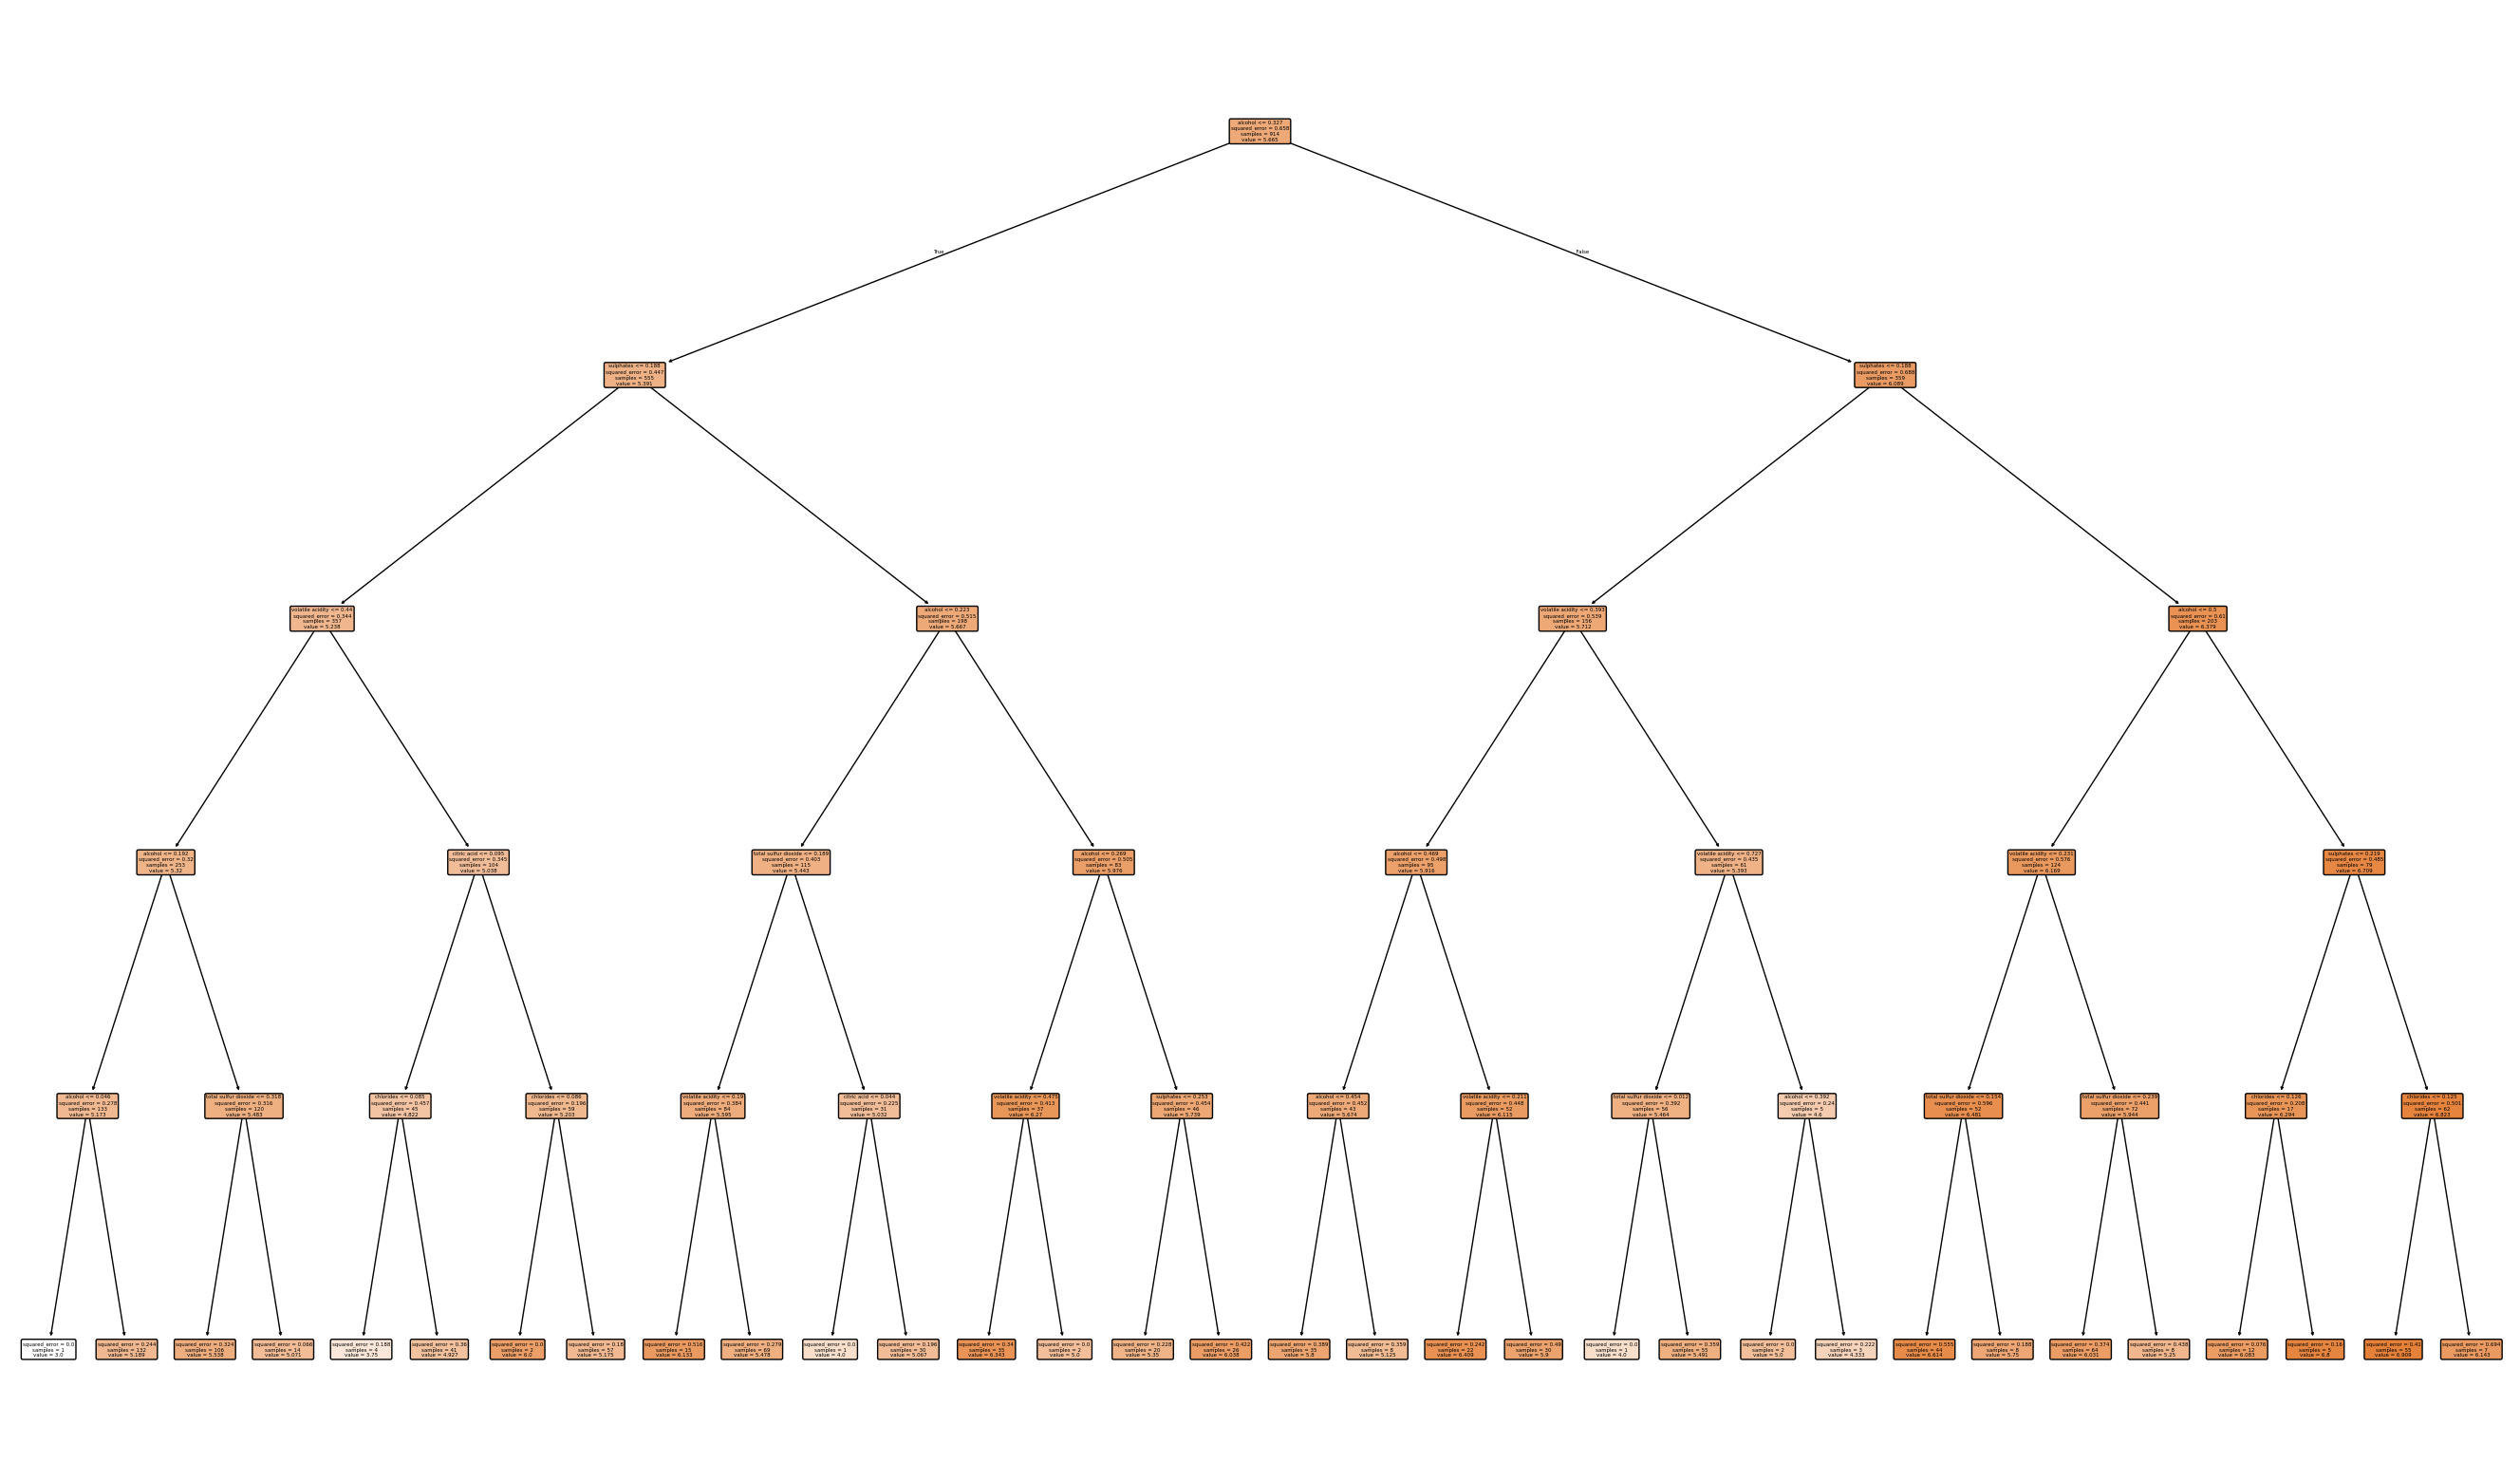

In [614]:
# Visualization of the decision tree nodes:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (34,20))
plot_tree(tree, filled = True, rounded=True, feature_names=list(X_train_sel.columns))
# Safe the plot (needs to be done first, before showing it!)
# plt.savefig("WineQuality_DecisionTree.png", dpi=500)
####  ONLY RUN ONCE !!!! ####
plt.show()

In [474]:
# Applying futher classification models from ensemble
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [476]:
# Choose Logistic Regression Classifier and add Bagging Classifier to it
bagging_clf = BaggingClassifier(estimator=log_reg, n_estimators=100, max_samples = 500)

In [478]:
# Training Bagging model with normalized data
bagging_clf.fit(X_train_sel_norm, y_train_sel)

BaggingClassifier(estimator=LogisticRegression(), max_samples=500,
                  n_estimators=100)

In [480]:
# prediction of "Transported" classification applying Bagging Classification
pred_bag = bagging_clf.predict(X_test_sel_norm)

In [482]:
# Evaluate Bagging Classification model's performance --> calculate accuracy
accuracy_bag=bagging_clf.score(X_test_sel_norm, y_test_sel)
accuracy_bag

0.6593886462882096

In [484]:
# Choose Random Forest Classifier for modelling
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=20)

In [486]:
# Training Random Forest model with normalized data
forest_clf.fit(X_train_sel_norm, y_train_sel)

RandomForestClassifier(max_depth=20)

In [488]:
# prediction of "Transported" classification applying Random Forest Classification
pred_frst = forest_clf.predict(X_test_sel_norm)

In [490]:
# Evaluate Bagging Classification model's performance --> calculate accuracy
accuracy_frst=forest_clf.score(X_test_sel_norm, y_test_sel)
accuracy_frst

0.6419213973799127

In [510]:
# Choose Gradient Boosting Classifier for modelling
gb_clf = GradientBoostingClassifier(max_depth=20, n_estimators=100)

In [512]:
# Training Gradient Boosting Classifier model with normalized data
gb_clf.fit(X_train_sel_norm, y_train_sel)

GradientBoostingClassifier(max_depth=20)

In [513]:
# prediction of "Transported" classification applying Gradient Boosting Classification
pred_gb = gb_clf.predict(X_test_sel_norm)

In [516]:
# Evaluate Gradient Boosting Classifier model's performance --> calculate accuracy
accuracy_gb=gb_clf.score(X_test_sel_norm, y_test_sel)
accuracy_gb

0.5327510917030568

In [500]:
# Choose Logistic Regression Modelling and add Adaptive Boosting Classifier for modelling
ada_clf = AdaBoostClassifier(estimator=log_reg, n_estimators=50, learning_rate=1.0)

In [502]:
# Training Adaptive Boosting Classifier model with normalized data
ada_clf.fit(X_train_sel_norm, y_train_sel)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=LogisticRegression())

In [504]:
# prediction of "Transported" classification applying Adaptive Boosting Classification
pred_ada = ada_clf.predict(X_test_sel_norm)

In [506]:
# Evaluate Adaptive Boosting Classifier model's performance --> calculate accuracy
accuracy_ada=ada_clf.score(X_test_sel_norm, y_test_sel)
accuracy_ada

0.6506550218340611

In [524]:
# Put all model names and accuracy values into a dataframe
accuracy_data = {
    "ML Model Name": ["KNN #1", "KNN #2", "KNN #3", "Logistic Regression", "Decision Tree", "LogReg + Bagging", "Random Forest", "Gradient Boosting", "LogReg + Adapt. Boosting"],
    "Features": ["11x non-normalized", "11x MinMax-normalized", "6x MinMax-normalized", "6x MinMax-normalized", "6x MinMax-normalized", "6x MinMax-normalized", "6x MinMax-normalized", "6x MinMax-normalized", "6x MinMax-normalized"],
    "Accuracy": [45.4, 62.0, 61.6, 66.8, 31.8, 65.9, 64.2, 53.3, 65.1]
}

df_accuracy = pd.DataFrame(accuracy_data)

# Display the DataFrame
print(df_accuracy)

              ML Model Name               Features  Accuracy
0                    KNN #1     11x non-normalized      45.4
1                    KNN #2  11x MinMax-normalized      62.0
2                    KNN #3   6x MinMax-normalized      61.6
3       Logistic Regression   6x MinMax-normalized      66.8
4             Decision Tree   6x MinMax-normalized      31.8
5          LogReg + Bagging   6x MinMax-normalized      65.9
6             Random Forest   6x MinMax-normalized      64.2
7         Gradient Boosting   6x MinMax-normalized      53.3
8  LogReg + Adapt. Boosting   6x MinMax-normalized      65.1


In [526]:
df_accuracy

,ML Model Name,Features,Accuracy
0,KNN #1,11x non-normalized,45.4
1,KNN #2,11x MinMax-normalized,62.0
2,KNN #3,6x MinMax-normalized,61.6
3,Logistic Regression,6x MinMax-normalized,66.8
4,Decision Tree,6x MinMax-normalized,31.8
5,LogReg + Bagging,6x MinMax-normalized,65.9
6,Random Forest,6x MinMax-normalized,64.2
7,Gradient Boosting,6x MinMax-normalized,53.3
8,LogReg + Adapt. Boosting,6x MinMax-normalized,65.1


C:\Users\admin\AppData\Local\Temp\ipykernel_41944\2803263336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="ML Model Name", y="Accuracy", data=df_accuracy, palette="viridis")


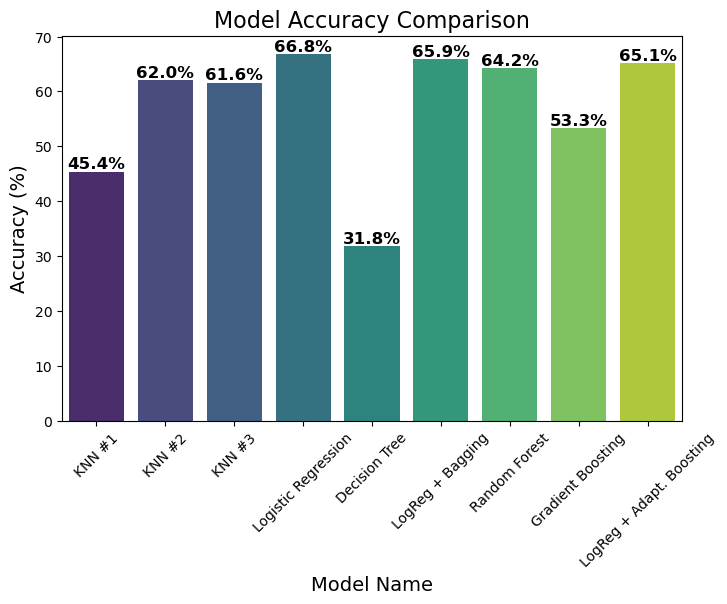

In [536]:
# plotting accuracy versus model
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="ML Model Name", y="Accuracy", data=df_accuracy, palette="viridis")

# Label the axes and title
plt.xlabel("Model Name", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add value labels on top of bars - seems to not work
for bar in ax.patches:  # Get bars from the seaborn plot
    yval = bar.get_height()  # Get bar height (accuracy value)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1f}%", 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_41944\4285034701.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature", y="Correlation", data=df_corr, palette="coolwarm")


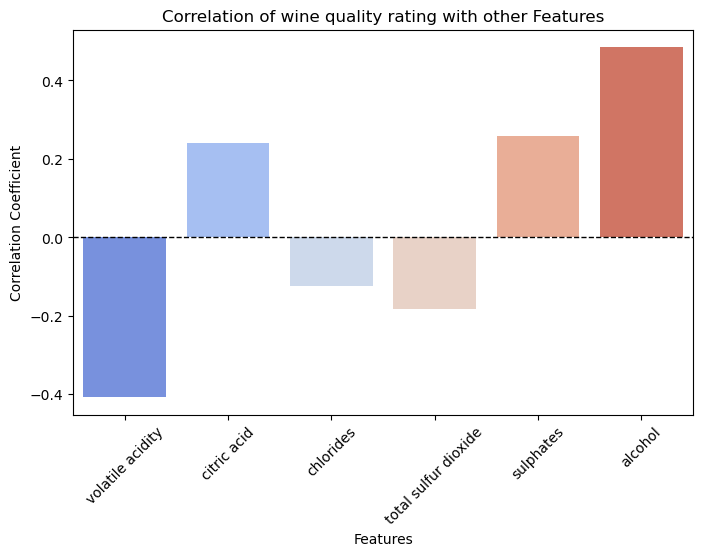

In [538]:
# Plot the correlation coefficient of "quality" with the 6 selected features

# Select the target column to compare
df_wine_quality_corr = df_wine_noID.drop(columns=["pH", "fixed acidity", "free sulfur dioxide", "density", "residual sugar"])
target_col = df_wine_quality_corr["quality"]

# Compute correlation with all other columns
correlations = df_wine_quality_corr.corr()["quality"].drop("quality")

# Convert to DataFrame
df_corr = correlations.reset_index()
df_corr.columns = ["Feature", "Correlation"]

# Plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="Feature", y="Correlation", data=df_corr, palette="coolwarm")

# Customize plot
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.title(f"Correlation of wine quality rating with other Features")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add reference line at 0
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [540]:
# Showing the coefficient of variation from Logistic Regression model:
log_reg.coef_

array([[ 0.87577971, -0.01015761,  0.10918663, -0.26906797, -0.23448139,
        -0.79494301],
       [ 2.05514794, -1.33514183, -0.21950918, -0.19095758, -0.51289044,
        -0.6123094 ],
       [ 1.52734047, -0.02109727,  0.86910133,  2.15060295, -2.33084953,
        -3.57171394],
       [-1.10294021, -0.63606922,  0.40260791, -0.43987773,  0.29679538,
         0.09598028],
       [-2.80520888,  0.82784518, -0.82945435, -0.66158484,  2.01269988,
         3.01267788],
       [-0.55011903,  1.17462076, -0.33193234, -0.58911482,  0.7687261 ,
         1.87030819]])

C:\Users\admin\AppData\Local\Temp\ipykernel_41944\3809984247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=X_test_sel_norm.columns, y=log_reg.coef_[0], palette="coolwarm")


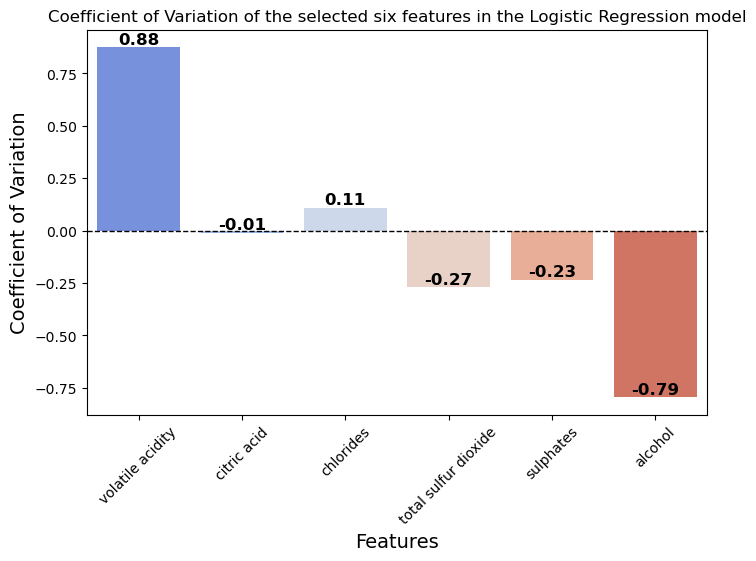

In [548]:
# plot the coefficient of variation from Logistic Regression model of each feature column compared to target column "quality":
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=X_test_sel_norm.columns, y=log_reg.coef_[0], palette="coolwarm")

# Customize plot
plt.xlabel("Features", fontsize=14)
plt.ylabel("Coefficient of Variation", fontsize=14)
plt.title(f"Coefficient of Variation of the selected six features in the Logistic Regression model", fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add reference line at 0
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add value labels on top of bars
for bar in ax.patches:  # Get bars from the seaborn plot
    yval = bar.get_height()  # Get bar height (coefficient value)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Print the plot
plt.show()

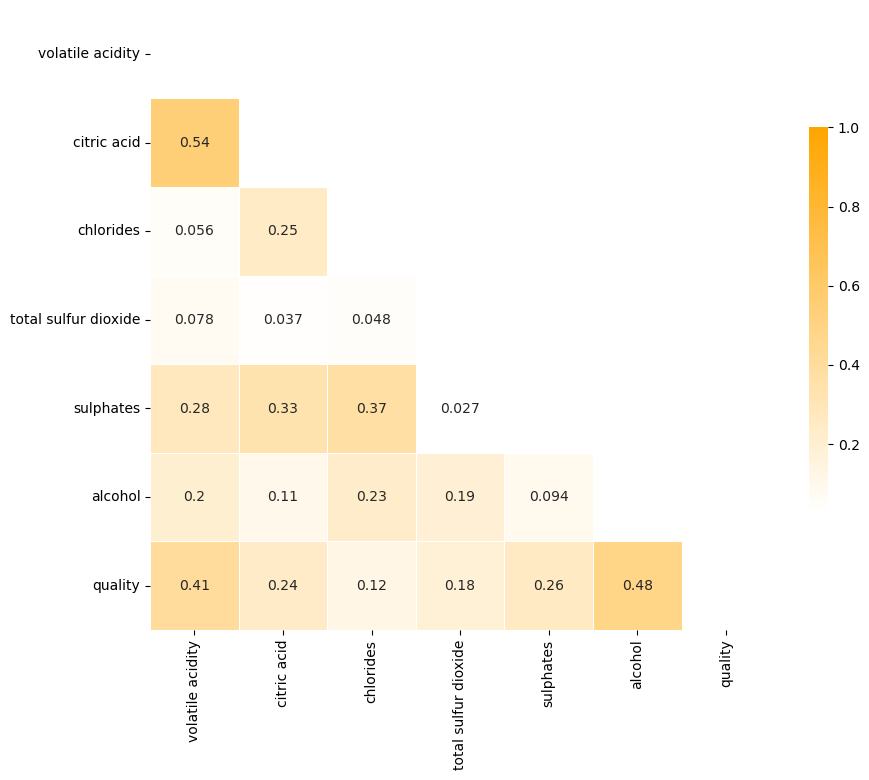

In [556]:
# Generate a heatmap for visualization of correlation only for the selected six features:

df_wine_6feat = df_wine_noID.drop(columns=["pH", "fixed acidity", "free sulfur dioxide", "density", "residual sugar"])
corr=np.abs(df_wine_6feat.corr())

#Set up mask for triangle representation
mask2 = np.zeros_like(corr, dtype=bool)
mask2[np.triu_indices_from(mask2)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
    # cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # cmap = sns.light_palette("orange", as_cmap=True)
# Define a custom colormap from white to orange
colors = ["white", "orange"]
cmap = LinearSegmentedColormap.from_list("white_orange", colors)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask2, cmap=cmap, vmax=1, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot = True)

plt.show()

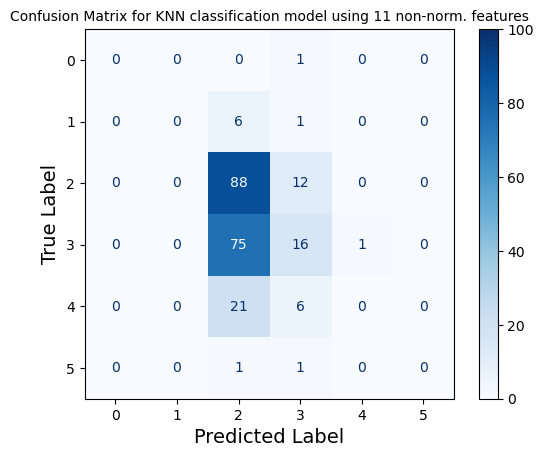

In [588]:
# Evaluate model's performance: checking prediction vs. real values: KNN with 11 non-norm features
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix
cm_train = confusion_matrix(y_test_sel, pred)
# Define fixed scale (adjust manually or use max of multiple matrices)
max_value=100
# Create ConfusionMatrixDisplay with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
# Plot confusion matrix
fig, ax = plt.subplots()  # Create figure and axis
disp.plot(cmap="Blues", ax=ax)  # Add color for better visualization. Pass the axis object to ensure we modify it

# Manually set the color scale using `imshow()`
im = ax.images[0]  # Get the heatmap image
im.set_clim(0, max_value)  # Set fixed scale from 0 to max_value

# Plot confusion matrix
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix for KNN classification model using 11 non-norm. features", fontsize=10)
# Show the plot
plt.show()

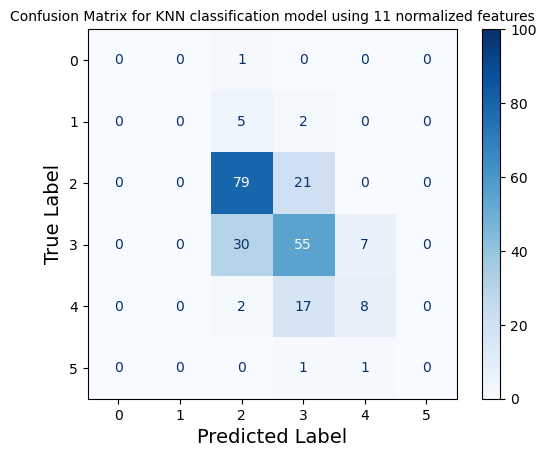

In [590]:
# Evaluate model's performance: checking prediction vs. real values: KNN with 11 normalized features
cm_train = confusion_matrix(y_test_sel, pred_norm)
max_value=100
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots() 
disp.plot(cmap="Blues", ax=ax) 
im = ax.images[0]  
im.set_clim(0, max_value)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix for KNN classification model using 11 normalized features", fontsize=10)
plt.show()

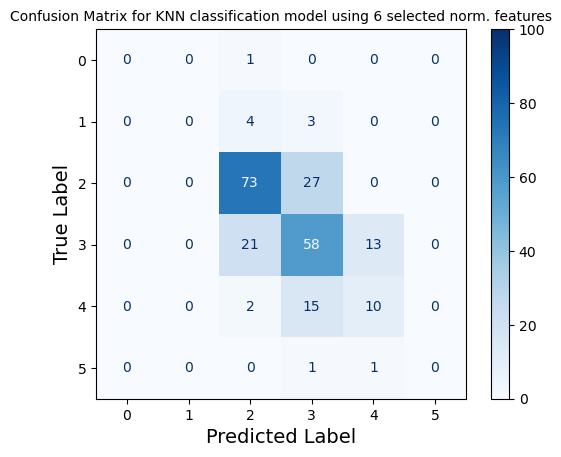

In [592]:
# Evaluate model's performance: checking prediction vs. real values: KNN with 6 normalized features
cm_train = confusion_matrix(y_test_sel, pred_sel_norm)
max_value=100
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots() 
disp.plot(cmap="Blues", ax=ax) 
im = ax.images[0]  
im.set_clim(0, max_value)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix for KNN classification model using 6 selected norm. features", fontsize=10)
plt.show()

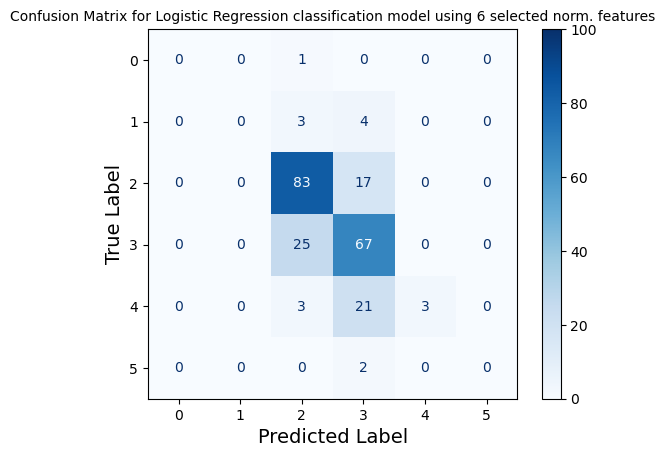

In [600]:
# Evaluate model's performance: checking prediction vs. real values: LogReg with 6 normalized features
cm_train = confusion_matrix(y_test_sel, pred_log)
max_value=100
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots() 
disp.plot(cmap="Blues", ax=ax) 
im = ax.images[0]  
im.set_clim(0, max_value)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix for Logistic Regression classification model using 6 selected norm. features", fontsize=10)
plt.show()

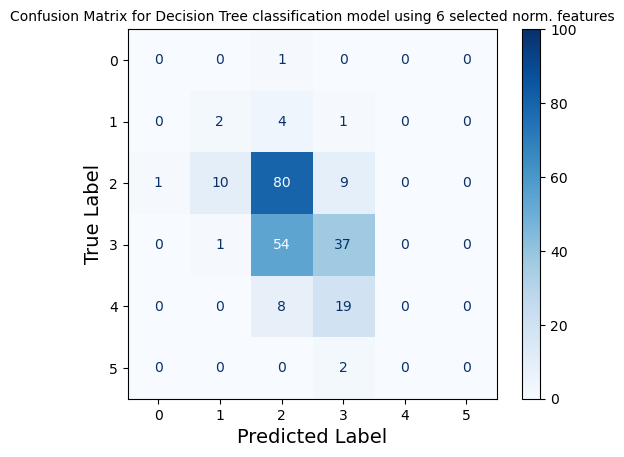

In [604]:
# Evaluate model's performance: checking prediction vs. real values: DecTree with 6 normalized features
cm_train = confusion_matrix(y_test_sel, pred_tree_int)
max_value=100
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots() 
disp.plot(cmap="Blues", ax=ax) 
im = ax.images[0]  
im.set_clim(0, max_value)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix for Decision Tree classification model using 6 selected norm. features", fontsize=10)
plt.show()

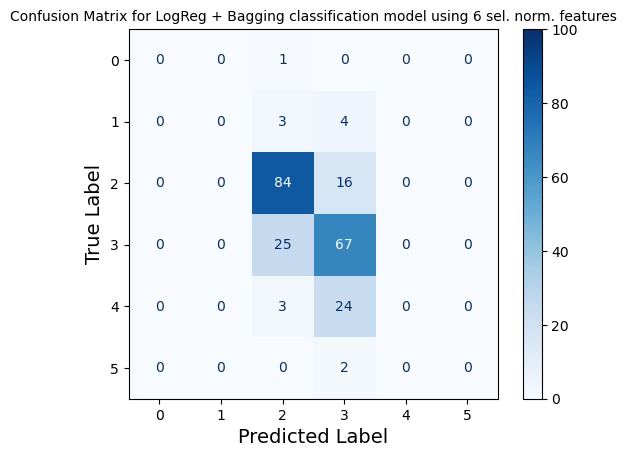

In [606]:
# Evaluate model's performance: checking prediction vs. real values: LogReg+Bagging with 6 normalized features
cm_train = confusion_matrix(y_test_sel, pred_bag)
max_value=100
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots() 
disp.plot(cmap="Blues", ax=ax) 
im = ax.images[0]  
im.set_clim(0, max_value)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix for LogReg + Bagging classification model using 6 sel. norm. features", fontsize=10)
plt.show()

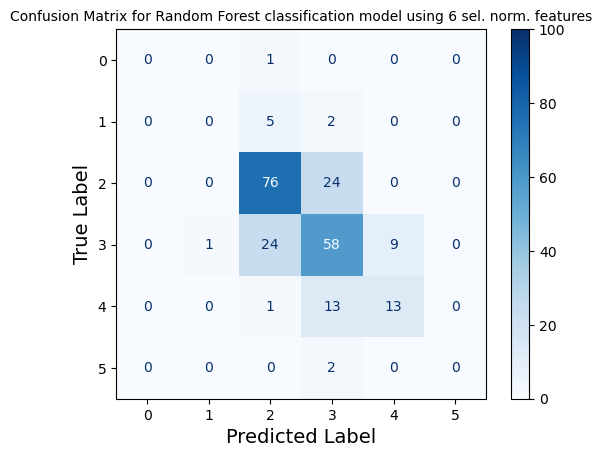

In [608]:
# Evaluate model's performance: checking prediction vs. real values: Random Forest with 6 normalized features
cm_train = confusion_matrix(y_test_sel, pred_frst)
max_value=100
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots() 
disp.plot(cmap="Blues", ax=ax) 
im = ax.images[0]  
im.set_clim(0, max_value)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix for Random Forest classification model using 6 sel. norm. features", fontsize=10)
plt.show()

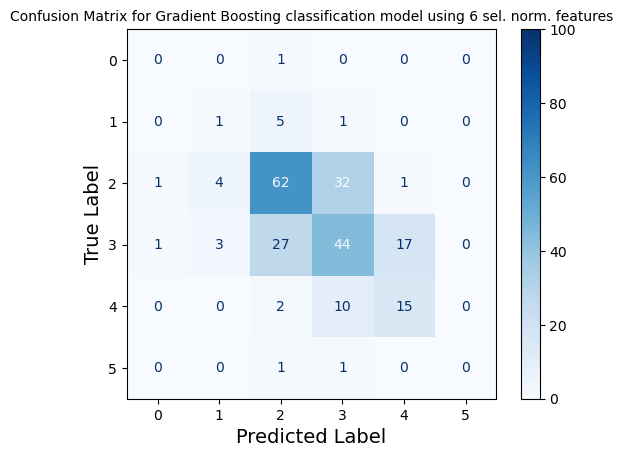

In [610]:
# Evaluate model's performance: checking prediction vs. real values: Gradient Boosting with 6 normalized features
cm_train = confusion_matrix(y_test_sel, pred_gb)
max_value=100
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots() 
disp.plot(cmap="Blues", ax=ax) 
im = ax.images[0]  
im.set_clim(0, max_value)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix for Gradient Boosting classification model using 6 sel. norm. features", fontsize=10)
plt.show()

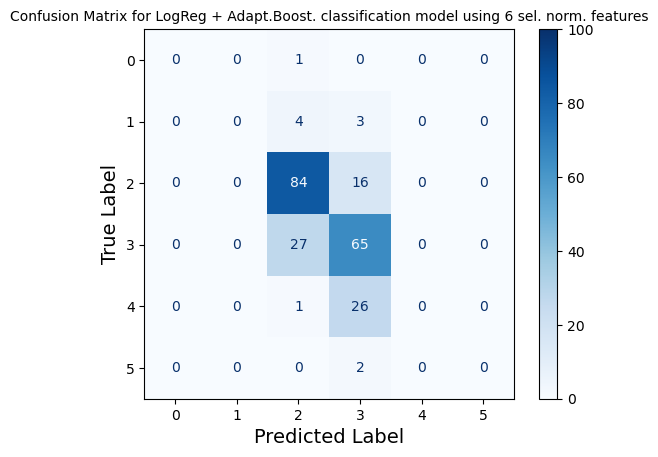

In [612]:
# Evaluate model's performance: checking prediction vs. real values: LogReg+AdaptBoost with 6 normalized features
cm_train = confusion_matrix(y_test_sel, pred_ada)
max_value=100
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots() 
disp.plot(cmap="Blues", ax=ax) 
im = ax.images[0]  
im.set_clim(0, max_value)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix for LogReg + Adapt.Boost. classification model using 6 sel. norm. features", fontsize=10)
plt.show()